# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [5]:
# Create Pandas DataFrame of the input and outputs
my_data = pd.concat([pd.DataFrame(data = x_data,columns = ['X Data']), 
                     pd.DataFrame(data = y_true,columns = ['Y'])],
                     axis = 1)

In [6]:
my_data.head()

,X Data,Y
0,0.00000,5.297199
1,0.00001,6.606755
2,0.00002,4.338352
3,0.00003,5.435969
4,0.00004,4.095518


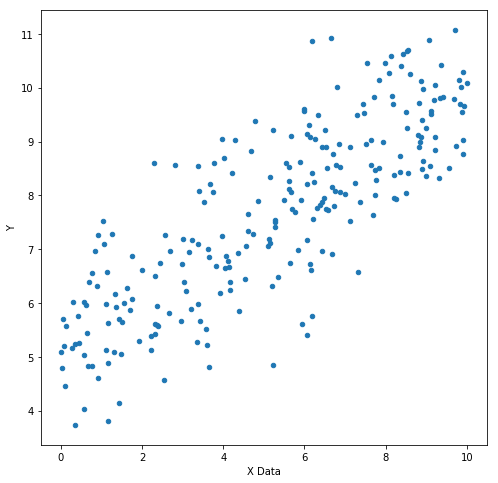

In [7]:
my_data.sample(n = 250).plot(kind = 'scatter',
                             x = 'X Data',
                             y = 'Y', 
                             figsize = (8, 8))

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [8]:
import tensorflow as tf

In [9]:
batch_size = 10

** Variables **

In [10]:
# Initialize the Variables
m = tf.Variable(0.5)
b = tf.Variable(1.0)

** Placeholders **

In [11]:
# Initialize the Placeholders of type float32 of shape [batchsize]
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [12]:
y_model = m * xph + b

** Loss Function **

In [13]:
error = tf.reduce_sum(tf.square(yph - y_model))

** Optimizer **

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [15]:
init = tf.global_variables_initializer()

### Session

In [16]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        # Pick random indexes
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        # Training dictionary
        feed = {xph : x_data[rand_ind],
                yph : y_true[rand_ind]}
        # Training process 
        sess.run(train,
                 feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [17]:
model_m

0.5736642

In [18]:
model_b

4.9676414

### Results

In [19]:
y_hat = x_data * model_m + model_b

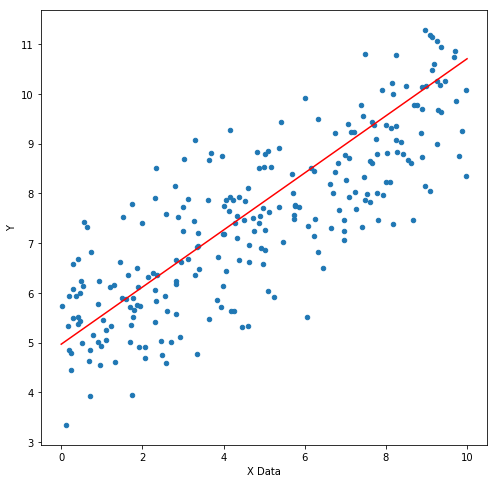

In [20]:
my_data.sample(n=250).plot(kind='scatter',
                           x = 'X Data',
                           y = 'Y', 
                           figsize = (8, 8))
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [21]:
# Input feature preparation (1 column)
feat_cols = [tf.feature_column.numeric_column('x',
                                              shape = [1])]

In [22]:
# Intializing a linear regression estimator
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ARCYFE~1\\AppData\\Local\\Temp\\tmp6v_h4tse', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000208FF68EAC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,
                                                    y_true,
                                                    test_size = 0.3, 
                                                    random_state = 101)

In [25]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [26]:
# Can also do .pandas_input_fn
# Input function used for the training 
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                                y_train,
                                                batch_size = 4,
                                                num_epochs = None,
                                                shuffle = True)

In [27]:
train_input_func_for_eval = tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                                                y_train,
                                                                batch_size = 4,
                                                                num_epochs = 1000,
                                                                shuffle = False)

In [28]:
eval_input_func_for_eval = tf.estimator.inputs.numpy_input_fn({'x' : x_eval},
                                                              y_eval,
                                                              batch_size = 4,
                                                              num_epochs = 1000,
                                                              shuffle = False)

### Train the Estimator

In [29]:
estimator.train(input_fn = input_func,
                steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\ARCYFE~1\AppData\Local\Temp\tmp6v_h4tse\model.ckpt.
INFO:tensorflow:loss = 333.51923, step = 0
INFO:tensorflow:global_step/sec: 317.666
INFO:tensorflow:loss = 15.380316, step = 100 (0.318 sec)
INFO:tensorflow:global_step/sec: 328.634
INFO:tensorflow:loss = 5.7202463, step = 200 (0.305 sec)
INFO:tensorflow:global_step/sec: 244.564
INFO:tensorflow:loss = 16.090336, step = 300 (0.411 sec)
INFO:tensorflow:global_step/sec: 279.065
INFO:tensorflow:loss = 5.9354787, step = 400 (0.354 sec)
INFO:tensorflow:global_step/sec: 281.422
INFO:tensorflow:loss = 2.3874576, step = 500 (0.358 sec)
INFO:tensorflow:global_step/sec: 261.53
INFO:tensorflow:loss = 11.104186, step = 600 (0.383 sec)
INFO:tensorflow:global_ste

### Evaluation

In [30]:
train_metrics = estimator.evaluate(input_fn = train_input_func_for_eval,
                                   steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-07-09:20:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ARCYFE~1\AppData\Local\Temp\tmp6v_h4tse\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-07-09:20:45
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1393224, global_step = 1000, loss = 4.5572896


In [31]:
eval_metrics = estimator.evaluate(input_fn = eval_input_func_for_eval,
                                  steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-07-09:20:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ARCYFE~1\AppData\Local\Temp\tmp6v_h4tse\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-07-09:20:48
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1409562, global_step = 1000, loss = 4.5638247


In [32]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.1393224, 'loss': 4.5572896, 'global_step': 1000}
eval metrics: {'average_loss': 1.1409562, 'loss': 4.5638247, 'global_step': 1000}


### Predictions

In [33]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x' : np.linspace(0, 10, 10)},
                                                      shuffle = False)

In [34]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ARCYFE~1\AppData\Local\Temp\tmp6v_h4tse\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2721343], dtype=float32)},
 {'predictions': array([4.971648], dtype=float32)},
 {'predictions': array([5.671162], dtype=float32)},
 {'predictions': array([6.370676], dtype=float32)},
 {'predictions': array([7.07019], dtype=float32)},
 {'predictions': array([7.769704], dtype=float32)},
 {'predictions': array([8.469217], dtype=float32)},
 {'predictions': array([9.168732], dtype=float32)},
 {'predictions': array([9.868246], dtype=float32)},
 {'predictions': array([10.567759], dtype=float32)}]

In [35]:
predictions = []# np.array([])
for x in estimator.predict(input_fn = input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ARCYFE~1\AppData\Local\Temp\tmp6v_h4tse\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
predictions

[array([4.2721343], dtype=float32),
 array([4.971648], dtype=float32),
 array([5.671162], dtype=float32),
 array([6.370676], dtype=float32),
 array([7.07019], dtype=float32),
 array([7.769704], dtype=float32),
 array([8.469217], dtype=float32),
 array([9.168732], dtype=float32),
 array([9.868246], dtype=float32),
 array([10.567759], dtype=float32)]

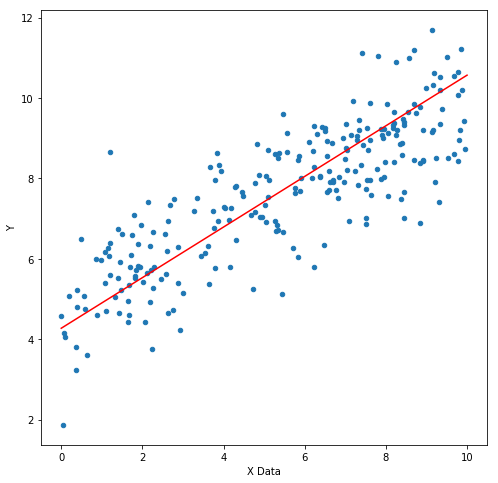

In [37]:
my_data.sample(n = 250).plot(kind = 'scatter',
                             x = 'X Data',
                             y = 'Y',
                            figsize = (8, 8))
plt.plot(np.linspace(0, 10, 10), predictions,'r')

# Great Job!